In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
base_path = '/Users/harsh/Desktop/Intelligent Reasoning Systems/Project/Raw Data'

In [3]:
location_data = pd.read_excel(os.path.join(base_path, 'Data 1.xlsx'))
location_data.columns = location_data.columns.str.replace(' ', '_').str.upper()

In [4]:
location_data.shape

(50461, 59)

In [5]:
location_data.dtypes

#                                   int64
DOCTYPE                            object
CANCELED                           object
DOCCUR                             object
DOCRATE                           float64
DOCSTATUS                          object
PO_NUM                              int64
BASE_TYPE                          object
BASE_NUMBER                       float64
BASE_LINE                         float64
SUPPLIER_NAME                      object
SUPPLIER_CODE                      object
DOC_DATE                   datetime64[ns]
DELIVERY_DATE              datetime64[ns]
EXPECTED_DATE              datetime64[ns]
FOLLOW_UP_DATE             datetime64[ns]
BUYER                              object
PO_VALUE                          float64
BP_PROJECT_CODE                    object
BP_PROJECT_NAME                    object
LINE_PROJECT_CODE                  object
LINE_PROJECT_NAME                  object
LOCATION                           object
ITEM_CODE                         

In [6]:
unique_counts = location_data.nunique()
unique_counts

#                          50461
DOCTYPE                        2
CANCELED                       2
DOCCUR                         8
DOCRATE                      610
DOCSTATUS                      2
PO_NUM                     15110
BASE_TYPE                      2
BASE_NUMBER                10775
BASE_LINE                    298
SUPPLIER_NAME               1615
SUPPLIER_CODE               1642
DOC_DATE                     744
DELIVERY_DATE                968
EXPECTED_DATE                  2
FOLLOW_UP_DATE                 2
BUYER                        101
PO_VALUE                   10978
BP_PROJECT_CODE              171
BP_PROJECT_NAME              170
LINE_PROJECT_CODE            373
LINE_PROJECT_NAME            369
LOCATION                      59
ITEM_CODE                  20592
ITEM_NAME                  23937
FG_ITEM_DESCRIPTION         6666
ITEM_DETAILS               11598
MANUFACTURER_PART_NO        9354
HSN                         1670
UOM                           78
ORDERED_QU

In [7]:
threshold = 10

group_1 = unique_counts[unique_counts < threshold]
group_2 = unique_counts[unique_counts >= threshold]

In [8]:
sparse_columns = group_1.index.to_list()

for column in sparse_columns:
    print(column)
    print(location_data[column].dropna().unique())
    print()

DOCTYPE
['I' 'S']

CANCELED
['N' 'Y']

DOCCUR
['INR' 'EUR' 'USD' 'AUD' 'CHF' 'GBP' 'JPY' 'KWD']

DOCSTATUS
['C' 'O']

BASE_TYPE
['PR' -1]

EXPECTED_DATE
<DatetimeArray>
['2023-01-06 00:00:00', '2023-05-03 00:00:00']
Length: 2, dtype: datetime64[ns]

FOLLOW_UP_DATE
<DatetimeArray>
['2023-05-03 00:00:00', '2023-01-16 00:00:00']
Length: 2, dtype: datetime64[ns]

MANUALLY_CLOSED_PO
['No' 'Yes']

BRANCH_NAME
['NOIDA' 'Ecotech X' 'AFSNOIDA' 'GUJARAT' 'MUMBAI']

IMP_OR_EXP
['N' 'Y']

COST_SAVING_CRITERIA
['Against L2' 'Against LPP' 'Negotiated' 'Others']



In [9]:
group_2

#                          50461
DOCRATE                      610
PO_NUM                     15110
BASE_NUMBER                10775
BASE_LINE                    298
SUPPLIER_NAME               1615
SUPPLIER_CODE               1642
DOC_DATE                     744
DELIVERY_DATE                968
BUYER                        101
PO_VALUE                   10978
BP_PROJECT_CODE              171
BP_PROJECT_NAME              170
LINE_PROJECT_CODE            373
LINE_PROJECT_NAME            369
LOCATION                      59
ITEM_CODE                  20592
ITEM_NAME                  23937
FG_ITEM_DESCRIPTION         6666
ITEM_DETAILS               11598
MANUFACTURER_PART_NO        9354
HSN                         1670
UOM                           78
ORDERED_QUANTITY            1105
PRICE                      18757
ITEM_VALUE                 24852
FREIGHT                      448
TAX_CODE                      33
TAX_AMOUNT(LC)             18659
LINETOTAL_WITH_TAX_(LC)    25484
BALANCE_QU

In [10]:
dense_columns = group_2.index.to_list()

# for column in dense_columns:
#     print(column)
#     print(location_data[column].dropna().unique())
#     print()

In [13]:
# LOAD ELECTRICAL PARTS INFO
electric_parts_data = pd.read_csv(os.path.join(base_path, 'Final CSV Files', 'Electrical Parts Report Modified.csv'), encoding='ISO-8859-1')
electric_parts_data.columns = electric_parts_data.columns.str.replace(' ', '_').str.upper()
electric_parts_data = electric_parts_data.drop(labels=['PART_OWNER', 'PART_REVISION', 'MOUNTING_CLEARANCES_(MM)', 'OLD_PLM_ID', 'OLD_SAP_ID', 'RELEASED_STATUS', 'PART_CATEGORY'], axis=1)

In [14]:
electric_parts_data.shape

(9359, 14)

In [15]:
electric_parts_data.head()

,PART_ID,PART_NAME,PART_DESCRIPTION,REVISION_DATE,PRODUCT_GROUP,PRODUCT_SUBGROUP,WIDTH_(MM),HEIGHT_(MM),DEPTH_(MM),WEIGHT_(KG),MANUFACTURER,MANUFACTURER_PART_NUMBER,EPLAN_PART_NUMBER,RELEASED_DATE
0,41237,"CABLE GLAND- DOUBLE COMPRESSION CABLE, M90","CABLE GLAND DOUBLE COMPRESSION, SS304, OD:72-8...",31-Aug-2023 16:47,0.0,0.0,0.0,0.0,0.0,0.000,CGS,CGW 014,CGS.CGW 014,18-Sep-2023 10:46
1,52897,"E-STOP- LED, SELF MONTORING, 2CH",EMERGENCY PUSH BUTTON,01-Mar-2024 16:47,12.0,1.0,0.0,0.0,0.0,2.700,ROCKWELL,800F-1YMD81,A-B.800F-1YMD81,08-Mar-2024 11:36
2,54675,"INTERFACE MODULE-PLC,RS485",CPU - CENTRAL PROCESSING UNITS NX1P RS-422/485...,11-Apr-2024 12:38,26.0,1.0,0.0,0.0,0.0,0.000,OMRON,NX1W-CIF11,OMR.NX1W-CIF11,12-Apr-2024 10:46
3,57680,"BRAKE CONNECTOR-FOR HF-SE/SN/SP/JP,HG-SN/SR,HK...","BRAKE CONNECTOR FOR HF-SE/SN/SP/JP,HG-SN/SR,HK...",31-May-2024 12:11,129.0,1.0,90.0,60.0,110.0,0.050,MITSUBISHI,MR-BKCNS1-2M-L,MIT.MR-BKCNS1-2M-L,31-May-2024 16:43
4,64912,CONTACT-1NO,WITHOUT HOLDER - NON-ILLUMINATED - SINGLE CONT...,21-Sep-2024 14:05,6.0,194.0,10.0,44.0,28.0,0.013,ABB,1SFA611610R1001,ABB.1SFA611610R1001,23-Sep-2024 13:59


In [23]:
merged_data_on_code = pd.merge(location_data, electric_parts_data, how="inner", left_on="ITEM_CODE", right_on="PART_ID")
merged_data_on_code.shape

(4592, 73)

In [24]:
merged_data_on_code.head()

,#,DOCTYPE,CANCELED,DOCCUR,DOCRATE,DOCSTATUS,PO_NUM,BASE_TYPE,BASE_NUMBER,BASE_LINE,...,PRODUCT_GROUP,PRODUCT_SUBGROUP,WIDTH_(MM),HEIGHT_(MM),DEPTH_(MM),WEIGHT_(KG),MANUFACTURER,MANUFACTURER_PART_NUMBER,EPLAN_PART_NUMBER,RELEASED_DATE
0,3874,I,N,INR,1.0,C,60186,-1,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,ICOTEK,50741,ICO.50741,17-Jul-2023 16:17
1,3875,I,N,INR,1.0,C,60186,-1,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,ICOTEK,50741,ICO.50741,17-Jul-2023 16:17
2,3954,I,N,INR,1.0,C,60213,-1,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,Icotek gmbh,44053,ICO.44053,12-Dec-2022 18:37
3,8557,I,N,INR,1.0,C,72163,-1,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,ICOTEK,KEL-DPZ-HD,ICO.70351,25-Nov-2022 18:01
4,13537,I,N,INR,1.0,C,73639,PR,101378.0,21.0,...,1.0,1.0,NaN,NaN,NaN,NaN,ICOTEK,KEL-DPZ-HD,ICO.70351,25-Nov-2022 18:01


In [35]:
merged_data_on_name = pd.merge(location_data, electric_parts_data, how="inner", left_on="ITEM_NAME", right_on="PART_NAME")
merged_data_on_name.shape

(166002, 73)

In [36]:
merged_data_on_name.head()[['PO_NUM', 'ITEM_CODE', 'ITEM_NAME', 'PART_ID', 'PART_NAME']]

,PO_NUM,ITEM_CODE,ITEM_NAME,PART_ID,PART_NAME
0,60186,18165,Cable Entry Plate,18166,Cable Entry Plate
1,60186,18165,Cable Entry Plate,25934,Cable Entry Plate
2,60186,18165,Cable Entry Plate,18166,Cable Entry Plate
3,60186,18165,Cable Entry Plate,25934,Cable Entry Plate
4,60213,18166,Cable Entry Plate,18166,Cable Entry Plate


In [37]:
merged_data_on_name[['PO_NUM', 'ITEM_CODE', 'ITEM_NAME', 'PART_ID', 'PART_NAME']].nunique()

PO_NUM       2853
ITEM_CODE    2156
ITEM_NAME    1085
PART_ID      3025
PART_NAME    1085
dtype: int64

In [41]:
merged_data_grouped_1 = merged_data_on_name.groupby(['ITEM_NAME'])[['ITEM_CODE', 'PART_ID']].nunique()
merged_data_grouped_1.shape

(1085, 2)

In [42]:
merged_data_grouped_1[merged_data_grouped_1['ITEM_CODE'] > 1]

,ITEM_CODE,PART_ID
ITEM_NAME,,
ACCESS POINT,2,2
ACTIVE COMPONENT,7,48
ACTUATOR,2,2
ANTENNA,3,4
Actuator,2,3
...,...,...
connector,2,1
control cable,5,12
control cable TPE,2,3


In [43]:
merged_data_grouped_1[merged_data_grouped_1['PART_ID'] > 1]

,ITEM_CODE,PART_ID
ITEM_NAME,,
ACCESS POINT,2,2
ACTIVE COMPONENT,7,48
ACTUATOR,2,2
ADAPTER,1,2
ANALOG OUTPUT MODULE,1,2
...,...,...
contactor - 3P,1,2
control cable,5,12
control cable TPE,2,3


In [52]:
merged_data_grouped_2 = merged_data_on_name.groupby(['ITEM_NAME'])

In [61]:
def process_list_items(lst:list[str]) -> list:
    return [str(num)[:5] if len(str(num)) > 5 else str(num) for num in lst]

In [62]:
merged_data_item_code = merged_data_grouped_2['ITEM_CODE'].unique()
merged_data_item_code = merged_data_item_code.apply(process_list_items)
merged_data_item_code

ITEM_NAME
0.25 Sq/mm WIRE WHITE/BLUE                                                           [17799]
0.5 SQ.MM Single core cable - BLUE, LAPP                                             [18776]
0.5 Sq/mm WIRE WHITE/BLUE                                                            [17798]
0.75 Sq/mm WIRE WHITE/BLUE                                                           [17802]
16 Digital Outputs, Remote, Modular I/O system                                       [18868]
                                                                     ...                    
single contact block                                                                 [17182]
white wire/cable 0.75 sqmm                                                           [14984]
wire                                              [14870, 14869, 14873, 14872, 15031, 15030]
wire armoured cables                                                                 [18074]
yellow wire/cable 0.75 sqmm                                 

In [63]:
merged_data_part_id = merged_data_grouped_2['PART_ID'].unique()
merged_data_part_id

ITEM_NAME
0.25 Sq/mm WIRE WHITE/BLUE                                                                  [17799]
0.5 SQ.MM Single core cable - BLUE, LAPP                                                    [18776]
0.5 Sq/mm WIRE WHITE/BLUE                                                                   [17798]
0.75 Sq/mm WIRE WHITE/BLUE                                                                  [17802]
16 Digital Outputs, Remote, Modular I/O system                                              [18868]
                                                                        ...                        
single contact block                                                                        [17182]
white wire/cable 0.75 sqmm                                                                  [14984]
wire                                              [15027, 15030, 14870, 14873, 14869, 14872, 150...
wire armoured cables                                                                      

In [66]:
intersect_result = merged_data_item_code.combine(merged_data_part_id, lambda x, y: np.intersect1d(x, y))
intersect_result

ITEM_NAME
0.25 Sq/mm WIRE WHITE/BLUE                                                    [17799]
0.5 SQ.MM Single core cable - BLUE, LAPP                                      [18776]
0.5 Sq/mm WIRE WHITE/BLUE                                                     [17798]
0.75 Sq/mm WIRE WHITE/BLUE                                                    [17802]
16 Digital Outputs, Remote, Modular I/O system                                [18868]
                                                                 ...                 
single contact block                                                          [17182]
white wire/cable 0.75 sqmm                                                    [14984]
wire                                              [14869, 14870, 14872, 14873, 15030]
wire armoured cables                                                          [18074]
yellow wire/cable 0.75 sqmm                                                   [15011]
Length: 1085, dtype: object

In [67]:
union_result = merged_data_item_code.combine(merged_data_part_id, lambda x, y: np.union1d(x, y))
union_result

ITEM_NAME
0.25 Sq/mm WIRE WHITE/BLUE                                                                  [17799]
0.5 SQ.MM Single core cable - BLUE, LAPP                                                    [18776]
0.5 Sq/mm WIRE WHITE/BLUE                                                                   [17798]
0.75 Sq/mm WIRE WHITE/BLUE                                                                  [17802]
16 Digital Outputs, Remote, Modular I/O system                                              [18868]
                                                                        ...                        
single contact block                                                                        [17182]
white wire/cable 0.75 sqmm                                                                  [14984]
wire                                              [14869, 14870, 14872, 14873, 15027, 15028, 150...
wire armoured cables                                                                      

In [61]:
item_df = pd.DataFrame({
    'COUNT': location_data.groupby('SUPPLIER_CODE')['ITEM_CODE'].count(),
    'NAN_COUNT': location_data.groupby('SUPPLIER_CODE')['ITEM_CODE'].apply(lambda x: x.isnull().sum()),
    'UNIQUE_COUNT': location_data.groupby('SUPPLIER_CODE')['ITEM_CODE'].nunique(),
    'UNIQUE': location_data.groupby('SUPPLIER_CODE')['ITEM_CODE'].apply(lambda x: x.dropna().unique())
})

repeating_items = item_df[item_df['COUNT'] > item_df['UNIQUE_COUNT']]
repeating_items

,COUNT,NAN_COUNT,UNIQUE_COUNT,UNIQUE
SUPPLIER_CODE,,,,
VCD000016,4,0,3,"[CW00995, CW00996, CW00997]"
VCD000019,8,0,7,"[CW01004, CW01005, CW01006, CW01008, CWIP00227..."
VCD000025,7,2,3,"[CW01014, CW01015, CW01016]"
VCD000035,38,10,29,"[CW01189, CW01190, CW01191, CW01192, CW01193, ..."
VCD000037,6,0,3,"[CW01066, CW01173, GC00815]"
...,...,...,...,...
VO000075,2,0,1,[EL16746]
VO000101,4,0,3,"[2455400, 2550500, 1510900]"
VO000103,3,0,2,"[EL17471, EL18961]"


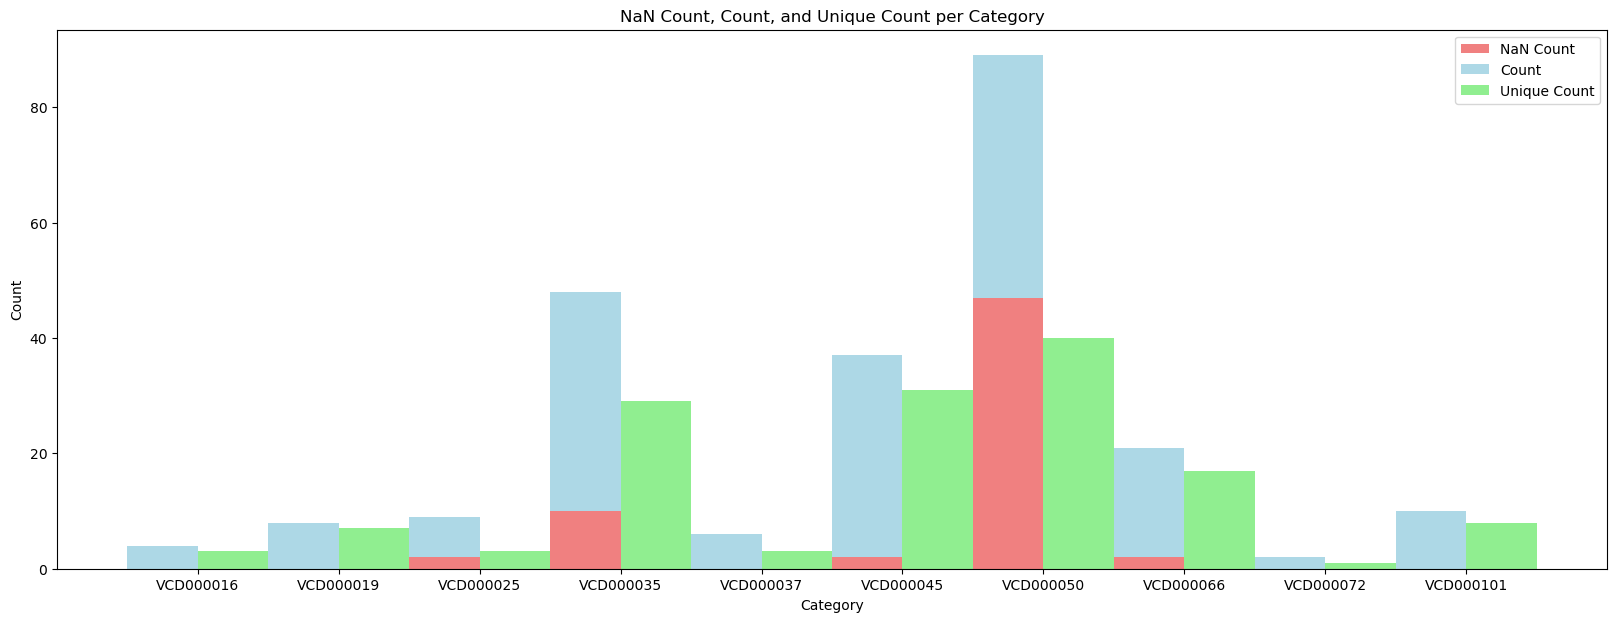

In [60]:
# Plot the graph for the top 10 SUPPLIER_CODE with item count

# repeating_items = repeating_items[:10]

categories = repeating_items.index
width = 0.5  # Width of the bars

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(20, 7))

# Plotting the first bar (Normal Count + NaN Count)
bar1 = ax.bar(categories, repeating_items['NAN_COUNT'], width, label='NaN Count', color='lightcoral')
bar2 = ax.bar(categories, repeating_items['COUNT'], width, bottom=repeating_items['NAN_COUNT'], label='Count', color='lightblue')

# Plotting the second bar (Unique Count)
bar3 = ax.bar([x + width for x in range(len(categories))], repeating_items['UNIQUE_COUNT'], width, label='Unique Count', color='lightgreen')

# Adding labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('NaN Count, Count, and Unique Count per Category')
ax.set_xticks([x + width / 2 for x in range(len(categories))])
ax.set_xticklabels(categories)

ax.legend()
plt.show()

In [79]:
transaction_items = pd.DataFrame({
    'ITEM_COUNT': location_data.groupby('PO_NUM')['ITEM_NAME'].nunique(),
    'ITEMS': location_data.groupby('PO_NUM')['ITEM_NAME'].apply(lambda x: x.dropna().unique())
})

transaction_items = transaction_items.sort_values(by='ITEM_COUNT', ascending=False)
transaction_items

,ITEM_COUNT,ITEMS
PO_NUM,,
232433841,265,"[RMCF0603ZT0R00 RES 0 OHM JUMPER 1/10W 0603, R..."
242504056,254,"[SMF4L30CA TVS DIODE 30VWM 48.4VC SOD123FL, RM..."
232433489,203,[CAP CER 4.7UF 16V X5R 0603: C1608X5R1C475K080...
232431784,191,[RR1220P-122-D RES SMD 1.2K OHM 0.5% 1/10W 080...
232433058,187,[RES SMD 1K OHM 0.1% 1/10W 0603: RT0603BRD071K...
...,...,...
232420121,1,[PRINTER-197x267x191MM203DPI152 MM PER SECUSBB...
232420123,1,[Matrix Cosec VEGA FAX with Battery backup (Ha...
232420124,1,[EM Prox Card Module for Vega Fax Device]


In [122]:
# transaction_items.iloc[0]['ITEMS']

In [117]:
items_without_code = location_data[location_data['ITEM_CODE'].isnull()]['ITEM_NAME']

items_without_code_count = items_without_code.count() # 5252
items_without_code_unique_count = items_without_code.nunique() # 4724

In [124]:
items_with_code_df = location_data[~location_data['ITEM_CODE'].isnull()]

items_with_code = items_with_code_df['ITEM_NAME']
# 2 null ITEM_NAME rows are also present
items_with_code_count = items_with_code.count() # 45207
items_with_code_unique_count = items_with_code.nunique() # 19214

In [129]:
items_with_code_df[['ITEM_CODE', 'ITEM_NAME']] # length = 45209

,ITEM_CODE,ITEM_NAME
0,MC11560,Bracket no A-081-G MDR Locking Strip
1,4556800,Locking Plate
11,ST00545,Integration for SolidWorks (TC30607)
12,ST00546,Teamcenter Gateway for EDA (TC31050
13,GC01436,Fixture for machinining Al. Bars
...,...,...
50456,00047513A,ZIPPY 25 TOP COVER-1
50457,00047494A,ZIPPY 25 FRONT COVER - 1
50458,00047510A,ZIPPY 25 - SIDE COVER - 01
50459,3079000,Tube 200x200x14mm (350YST)


In [186]:
def contains_nan_or_none(arr):
    # Check for None values
    if np.any(pd.isnull(arr)):  # This will check both None and NaN
        return True
    return False

In [171]:
unique_items_with_code = items_with_code_df[['ITEM_CODE', 'ITEM_NAME']].groupby('ITEM_CODE')['ITEM_NAME'].unique()
item_code_with_more_than_one = unique_items_with_code[unique_items_with_code.apply(lambda x: len(x) > 1)]
item_code_with_exactly_one = unique_items_with_code[unique_items_with_code.apply(lambda x: len(x) == 1)]
item_code_with_less_than_one = unique_items_with_code[unique_items_with_code.apply(lambda x: len(x) < 1)]

In [170]:
item_code_with_more_than_one

ITEM_CODE
5          [10100079 Deep groove ball bearing 61901-2RS1 ...
14         [BEARING, Deep Groove Ball Bearing, Deep Groov...
15               [BEARING, Deep Groove Ball Bearing ID-10mm]
16         [BEARING, Deep Groove Ball Bearing, Deep Groov...
17         [BEARING, Deep Groove Ball Bearing, Deep Groov...
                                 ...                        
PK00016     [Wooden Log For Packing, Wooden Log for Packing]
SP00051    [Steel Wire Rope 13mm dia, Steel Wire Rope 13m...
SP00328    [Allen key set normal AKM 9, Allen key set nor...
SP00331    [Spanner set(D Type), Spanner set(Ring type & ...
SP00520    [Bearing NTN-AEL210W3, Bearing NTN-AEL210W3 + ...
Name: ITEM_NAME, Length: 1325, dtype: object

In [176]:
# Any item code that contains a nan in the numpy array
# for 1-to-many code and name mapping
item_code_with_more_than_one[item_code_with_more_than_one.apply(contains_nan_or_none)]

Series([], Name: ITEM_NAME, dtype: object)

In [184]:
item_code_with_exactly_one

ITEM_CODE
18                                                     [BEARING]
68                                                [Roller Chain]
70                                                   [FLAT BELT]
71                                                  [Drive Belt]
73                                                        [BELT]
                                     ...                        
ST00558                  [Motorcortex MCX - Generic APP License]
ST00559                  [COSEC CENTRA PLT100 Perpetual License]
ST00560                  [COSEC CENTRA ACM100 Perpetual License]
ST00570        [WS17-PRO-C VMware Workstation 17 Pro for Linu...
\0003786500    [SERVER-CLOCK SPEED 3.2 GHzRAM 32 GBSSD 960 GB...
Name: ITEM_NAME, Length: 19267, dtype: object

In [187]:
# Any item code that is equal to nan
# for 1-to-1 code and name mapping
item_code_with_exactly_one[item_code_with_exactly_one.apply(contains_nan_or_none)]

ITEM_CODE
SF00123    [nan]
SF00134    [nan]
Name: ITEM_NAME, dtype: object